In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [2]:
pop_csv = 'pop_data\mn_county_pop_v2.csv'

In [3]:
pop_csv = pd.read_csv(pop_csv, encoding="utf-8")

pop_csv.head()

,Geography Type,Geography Name,Year,Population,Households,Persons Per Household (PPH)
0,State,Minnesota,2018,5629416.0,2221628.0,2.47
1,County,Aitkin,2018,15896.0,7359.0,2.12
2,County,Anoka,2018,357851.0,130596.0,2.71
3,County,Becker,2018,34420.0,14165.0,2.40
4,County,Beltrami,2018,46834.0,18039.0,2.48


In [4]:
#extract column info needed
array = ['Anoka', 'Carver', 'Hennepin', 'Dakota', 'Ramsey',
        'Scott', 'Washington']
pop_df = pop_csv.loc[pop_csv['Geography Name'].isin(array)]

array1 = [2010,2011,2012,2013,2014,2015]
pop_df1 = pop_df.loc[pop_df['Year'].isin(array1)]
pop_df1 = pop_df1.sort_values(by= 'Year',ascending='False')

print(len(pop_df1))


42


In [5]:
#create Population Density column
pop_df1['Population Density'] = ''
pop_df1.head()

,Geography Type,Geography Name,Year,Population,Households,Persons Per Household (PPH),Population Density
890,County,Washington,2010,238136.0,87859.0,2.67,
810,County,Anoka,2010,330844.0,121227.0,2.70,
818,County,Carver,2010,91042.0,32891.0,2.74,
878,County,Scott,2010,129928.0,45108.0,2.85,
835,County,Hennepin,2010,1152425.0,475913.0,2.37,


In [6]:
#divide population by square mileage for population density
#county square mileage
an = 446
ca = 376
he = 607
da = 587
ra = 170
sc = 368
wa = 423

for index, row in pop_df1.iterrows():
    if row['Geography Name'] == 'Anoka':
        anoka = (row['Population']/an)
        pop_df1.loc[index, 'Population Density'] = anoka
        
    if row['Geography Name'] == 'Carver':
        carver = row['Population']/ca
        pop_df1.loc[index, 'Population Density'] =carver
        
    if row['Geography Name'] == 'Hennepin':
        hennepin = row['Population']/he
        pop_df1.loc[index, 'Population Density'] =hennepin
        
    if row['Geography Name'] == 'Dakota':
        dakota = row['Population']/da
        pop_df1.loc[index, 'Population Density'] =dakota
        
    if row['Geography Name'] == 'Ramsey':
        ramsey = row['Population']/ra
        pop_df1.loc[index, 'Population Density'] =ramsey
        
    if row['Geography Name'] == 'Scott':
        scott = row['Population']/sc
        pop_df1.loc[index, 'Population Density'] =scott
        
    if row['Geography Name'] == 'Washington':
        washington = row['Population']/wa
        pop_df1.loc[index, 'Population Density'] =washington


In [7]:
pop_df1['Population Density'] = pop_df1['Population Density'].astype(int)

pop_df1.head()

,Geography Type,Geography Name,Year,Population,Households,Persons Per Household (PPH),Population Density
890,County,Washington,2010,238136.0,87859.0,2.67,562
810,County,Anoka,2010,330844.0,121227.0,2.70,741
818,County,Carver,2010,91042.0,32891.0,2.74,242
878,County,Scott,2010,129928.0,45108.0,2.85,353
835,County,Hennepin,2010,1152425.0,475913.0,2.37,1898


In [8]:
pop_df1 = pop_df1.drop(['Geography Type', 'Population', 'Households', 'Persons Per Household (PPH)','Year'], axis=1)
pop_df1 = round(pop_df1.groupby('Geography Name').mean(),2)
pop_df2 = pop_df1.reset_index()

pop_df2.to_csv('pop_density_final.csv')
pop_df2


,Geography Name,Population Density
0,Anoka,758.33
1,Carver,251.17
2,Dakota,692.17
3,Hennepin,1955.33
4,Ramsey,3063.50
5,Scott,367.00
6,Washington,578.67


In [9]:
life_path = 'life_data\life.csv'
life_df = pd.read_csv(life_path)
life_df = life_df.drop(['Unnamed: 0'], axis =1)
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False)
life_df

,County,Life Expectancy
0,Anoka,80.140260
1,Carver,82.370588
2,Dakota,80.683333
3,Hennepin,80.320438
4,Ramsey,79.533846
5,Scott,80.809524
6,Washington,81.847917


In [10]:
#merge the two data frames
combined_df = pd.concat([life_df,pop_df2],axis =1,sort=True)
combined_df = combined_df.drop(['Geography Name'],axis=1)
combined_df = combined_df.sort_values(by='Population Density',ascending = True)
combined_df

,County,Life Expectancy,Population Density
1,Carver,82.370588,251.17
5,Scott,80.809524,367.00
6,Washington,81.847917,578.67
2,Dakota,80.683333,692.17
0,Anoka,80.140260,758.33
3,Hennepin,80.320438,1955.33
4,Ramsey,79.533846,3063.50


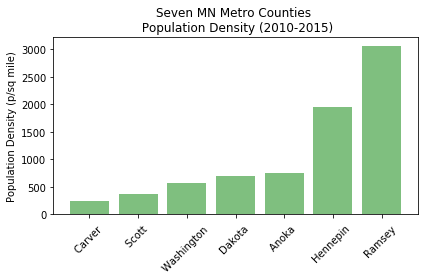

<Figure size 432x288 with 0 Axes>

In [24]:
#create bar chart
x_axis = np.arange(len(combined_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, combined_df['Population Density'], color ='g',alpha=0.5, align="center")
plt.xticks(tick_locations, combined_df['County'],rotation ='45')
plt.ylabel('Population Density (p/sq mile)')
plt.title('Seven MN Metro Counties \n Population Density (2010-2015)')

#get curret figure with plt.gcf()
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('pop_barchart.png',dpi = 300)

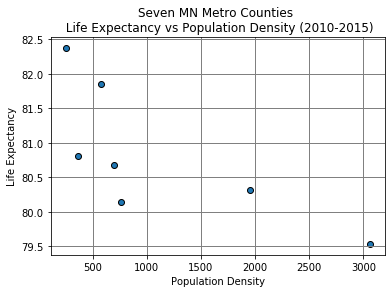

In [12]:
plt.scatter(combined_df['Population Density'],combined_df['Life Expectancy'], edgecolors='black')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('Population Density')
plt.ylabel('Life Expectancy')
plt.title('Seven MN Metro Counties \n Life Expectancy vs Population Density (2010-2015)')
plt.show()

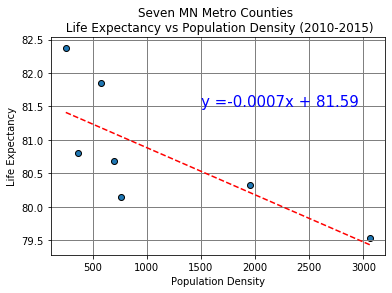

In [17]:
#perform linear regression
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(combined_df['Population Density'],combined_df['Life Expectancy'])

#regression equation line
p_fit = p_slope * combined_df['Population Density'] + p_int

#line equation
line_eq = 'y =' + str(round(p_slope,4)) + "x + " + str(round(p_int,2))

fig = plt.figure()
plt.scatter(combined_df['Population Density'],combined_df['Life Expectancy'], edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(combined_df['Population Density'],p_fit,"--",color="red")
plt.annotate(line_eq,xy=(1500,81.5),fontsize=15,color='blue')
plt.xlabel("Population Density")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Population Density (2010-2015)")
plt.show()

fig.savefig('LifeExpectancy_vs_Pop.png',dpi=300)

In [19]:
print(f'The r-value is {round(p_r,5)}.')
print(f'The p-value is {round(p_p,5)}.')
print(f'The standard error is {round(p_std_err,5)}.')

The r-value is -0.73727.
The p-value is 0.05864.
The standard error is 0.00029.
